In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.preprocessing import LabelEncoder
from numpy import linalg as LA
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

In [2]:
data=pd.read_csv('train superconductivity.csv')

In [3]:
data.head(10)

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,29.0
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,...,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606,26.0
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,...,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,19.0
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,...,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952,22.0
4,4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,...,2.242857,2.213364,2.206963,1.368922,1.096052,1,1.057143,0.433013,0.428809,23.0
5,4,88.944468,57.795044,66.361592,36.098926,1.181795,1.225203,122.90607,20.687458,51.968828,...,2.214286,2.213364,2.181543,1.368922,1.141474,1,1.000000,0.433013,0.410326,23.0
6,4,88.944468,57.682296,66.361592,36.069470,1.181795,1.316857,122.90607,10.765639,51.968828,...,2.142857,2.213364,2.119268,1.368922,1.194453,1,0.857143,0.433013,0.349927,11.0
7,4,76.517718,57.175142,59.310096,35.891368,1.197273,0.943560,122.90607,36.451199,44.289459,...,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,33.0
8,4,76.517718,56.808817,59.310096,35.773432,1.197273,0.981880,122.90607,34.833160,44.289459,...,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952,36.0
9,4,76.517718,56.442492,59.310096,35.655884,1.197273,1.016495,122.90607,33.215121,44.289459,...,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,31.0


In [4]:
dt=data.drop(labels='critical_temp',axis=1)

In [5]:
#dt.isnull().any()

In [6]:
#dt.info()

In [7]:
s=StandardScaler()
x=s.fit_transform(dt)
y=data.critical_temp

C:\Users\Aravind\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Aravind\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [8]:
pca = PCA(n_components=81)

principalComponents = pca.fit_transform(x)

In [9]:
pca.explained_variance_
len(pca.explained_variance_)

81

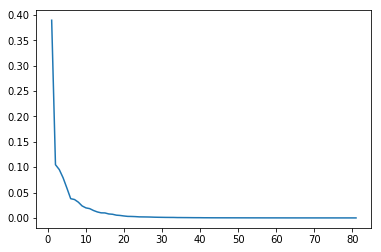

In [10]:
a=pca.explained_variance_ratio_
g=range(1,82)
plt.plot(g,a)


In [11]:
pca = PCA(.90)

principalComponents = pca.fit_transform(x)
# To get how many principal components was chosen
n_components = pca.n_components_
print("n_components = ",pca.n_components_)
pca = PCA(n_components)

principalComponents = pca.fit_transform(x)

# to get how much variance was retained
print(pca.explained_variance_ratio_.sum())

n_components =  12
0.9086880338271032


In [12]:
x_train=x
x_test=x
y_train=y
y_test=y

In [13]:
regressor=DecisionTreeRegressor()
regressor.fit(x_train, y_train)
y_pred=regressor.predict(x_test)
rmse=mean_squared_error(y_pred, y_test)
print("mean_squared_error = ", rmse)
#r2_score = r2_score(y_pred, y_test) 
#print("r2_score = ", r2_score)

mean_squared_error =  18.514249538204826


In [14]:
x_train1=principalComponents
x_test1= principalComponents
y_train1=y
y_test1=y

In [15]:
x_train1.shape,x_test1.shape,y_train1.shape,y_test1.shape

((21263, 12), (21263, 12), (21263,), (21263,))

In [16]:
regressor1=DecisionTreeRegressor()
regressor1.fit(x_train1, y_train1)
y_pred1=regressor1.predict(x_test1)
rmse1=mean_squared_error(y_pred1, y_test1)
print("mean_squared_error = ", rmse1)
r2_score = r2_score(y_pred1, y_test1) 
print("r2_score = ", r2_score)

mean_squared_error =  18.514249538204826
r2_score =  0.9839674582806059


In [17]:
from sklearn.metrics import r2_score

In [18]:
rmse1=r2_score(y_pred1, y_test1)

In [19]:
rmse1

0.9839674582806059